Analytic Report project

Given the dataset (https://www.kaggle.com/tmdb/tmdb-
movie-metadata), create an analytic report to answer three
below questions. The report should include the introduction,
describing the data, visualizations (scatter plot, bar graph,
histogram, boxplot, subplot, pie chart, heatmap, etc., each
graph should have an explained analysis followed), filtering
data to different categories, analysis (include t-test or Mann-
whitney for Hypothesis testing) and conclusions.
1. What areas have the most influence on revenue?
2. How is a movie’s revenue and average score affected by its
genre?
3. What influence does release date have on revenue?

In [3]:
import pandas as pd
import ast
import collections
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
credit = pd.read_csv('tmdb_5000_credits.csv', sep=',')
credit

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [4]:
movie = pd.read_csv('tmdb_5000_movies.csv', sep=',')
movie

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

Phân tích cơ bản về data movie gồm số chiều, số cột, mô tả

In [6]:
print(movie.shape)
print(movie.columns)

(4803, 20)
Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')


In [7]:
print(movie.head())

      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "nam

In [8]:
print(movie.info)
print(movie.describe())

<bound method DataFrame.info of          budget                                             genres  \
0     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2     245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
...         ...                                                ...   
4798     220000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4799       9000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
4800          0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
4801          0                                                 []   
4802          0                [{"id": 99, "name": "Documentary"}]   

                                               homepage      id  \
0                           http://www.avatarmovie.com/   19

1. What areas have the most influence on revenue?

In [3]:
movie['production_countries']

0       [{"iso_3166_1": "US", "name": "United States o...
1       [{"iso_3166_1": "US", "name": "United States o...
2       [{"iso_3166_1": "GB", "name": "United Kingdom"...
3       [{"iso_3166_1": "US", "name": "United States o...
4       [{"iso_3166_1": "US", "name": "United States o...
                              ...                        
4798    [{"iso_3166_1": "MX", "name": "Mexico"}, {"iso...
4799                                                   []
4800    [{"iso_3166_1": "US", "name": "United States o...
4801    [{"iso_3166_1": "US", "name": "United States o...
4802    [{"iso_3166_1": "US", "name": "United States o...
Name: production_countries, Length: 4803, dtype: object

In [9]:
movie['production_countries'] = movie['production_countries'].apply(ast.literal_eval)

In [4]:
country = movie['production_countries']
country

0       [{"iso_3166_1": "US", "name": "United States o...
1       [{"iso_3166_1": "US", "name": "United States o...
2       [{"iso_3166_1": "GB", "name": "United Kingdom"...
3       [{"iso_3166_1": "US", "name": "United States o...
4       [{"iso_3166_1": "US", "name": "United States o...
                              ...                        
4798    [{"iso_3166_1": "MX", "name": "Mexico"}, {"iso...
4799                                                   []
4800    [{"iso_3166_1": "US", "name": "United States o...
4801    [{"iso_3166_1": "US", "name": "United States o...
4802    [{"iso_3166_1": "US", "name": "United States o...
Name: production_countries, Length: 4803, dtype: object

In [11]:
revenue_by_area = {}
n_movie = {}
area_values = movie['production_countries']
revenue = movie['revenue']
for index, values in enumerate(area_values):
    if revenue[index] != 0:
        for value in values:
            if value['iso_3166_1'] in revenue_by_area:
                revenue_by_area[value['iso_3166_1']] += revenue[index]
                n_movie[value['iso_3166_1']] += 1
            else:
                revenue_by_area[value['iso_3166_1']] = revenue[index]
                n_movie[value['iso_3166_1']] = 1
                
d = collections.Counter(revenue_by_area)
top_revenue_by_area = []
for k, v in d.most_common(12):
    top_revenue_by_area.append(k)

print(top_revenue_by_area)

['US', 'GB', 'DE', 'CA', 'FR', 'AU', 'NZ', 'CN', 'JP', 'IT', 'CZ', 'HK']


In [14]:
areas = []
revenues = [] 
area_values = movie['production_countries']
revenue = movie['revenue']
for index, values in enumerate(area_values):
    if revenue[index] != 0:
        for value in values:
            if value['iso_3166_1'] in top_revenue_by_area:
                revenues.append(revenue[index])
                areas.append(value['iso_3166_1'])


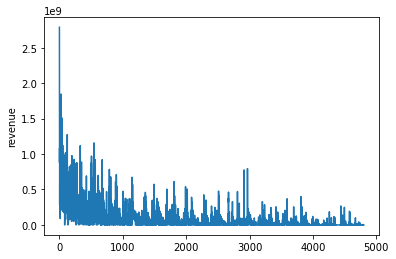

In [11]:
import matplotlib.pyplot as plt
plt.plot(movie['revenue'])
plt.ylabel('revenue')
plt.show()


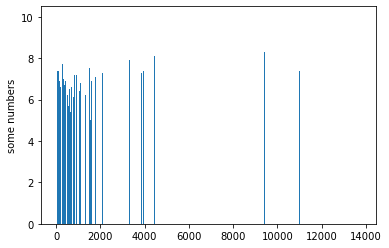

In [14]:
import matplotlib.pyplot as plt
plt.bar(movie['vote_count'], movie['vote_average'])
plt.ylabel('some numbers')
plt.show()

2. How is a movie’s revenue and average score affected by its genre?

In [15]:
movie['genres'] = movie['genres'].apply(ast.literal_eval)

In [21]:
genres = []
revenues = []
scores = []

genres_column = movie['genres']
revenue_column = movie['revenue']
score_column = movie['vote_average']

for index, values in enumerate(genres_column):
    if revenue_column[index] != 0:
        for value in values:
            genres.append(value['name'])
            revenues.append(revenue_column[index])
            scores.append(score_column[index])          

l = [genres,revenues, scores]
movie2 = pd.DataFrame(l, index=['genres','revenue', 'score']).T
movie2.head()

,genres,revenue,score
0,Action,2787965087,7.2
1,Adventure,2787965087,7.2
2,Fantasy,2787965087,7.2
3,Science Fiction,2787965087,7.2
4,Adventure,961000000,6.9


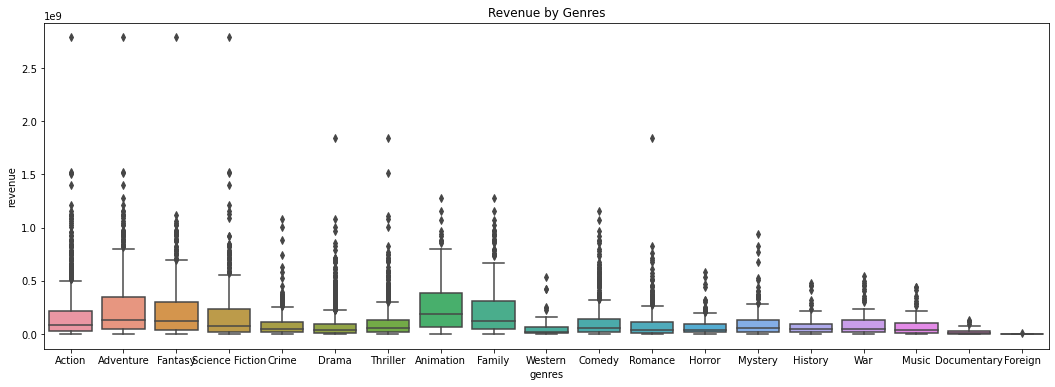

In [17]:
x = 'genres'
y = 'revenue'

plt.figure(figsize=(18,6))
ax = sns.boxplot(x=x,y=y, data=df3)
plt.title('Revenue by Genres')
plt.show()

t-test
doanh thu trung bình của thể loại Animation, Adventure và Fantasy cao nhất

In [18]:
sample_1 = movie2[movie2['genres']=='Animation'].filter(['revenue'])
sample_2 = (movie2[movie2['genres']!='Animation'].filter(['revenue'])).sample(sample_1.shape[0])
stats.ttest_rel(sample_2, sample_1)

Ttest_relResult(statistic=array([-5.35751986]), pvalue=array([2.42366411e-07]))

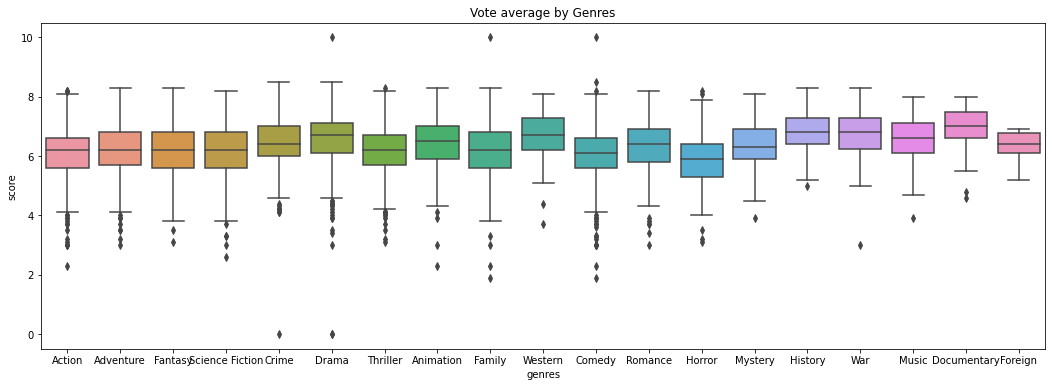

In [19]:

x = 'genres'
y = 'score'

plt.figure(figsize=(18,6))
ax = sns.boxplot(x=x,y=y, data=df3)
plt.title('Vote average by Genres')
plt.show()

Thể loại có ảnh hưởng đến doanh thu.
Thể loại Documentary có điểm trung bình cao nhất.

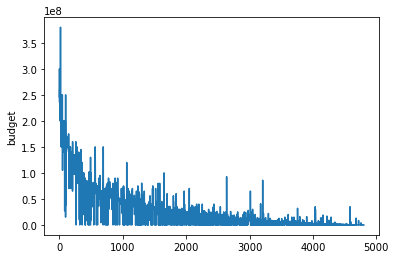

In [12]:
import matplotlib.pyplot as plt
plt.plot(movie['budget'])
plt.ylabel('budget')
plt.show()

3. What influence does release date have on revenue?

A/B Test

Anova Test

In [22]:
release_date = []
revenues = []
release_dates_column = movie['release_date']
revenue_column = movie['revenue']

for index, value in enumerate(release_dates_column):
    if revenue_column[index] != 0:
        genres.append(value)
        revenues.append(revenue_column[index])      

l = [genres,revenues]
movie3 = pd.DataFrame(l, index=['release date','revenue']).T
movie3

,release date,revenue
0,Action,2787965087
1,Adventure,961000000
2,Fantasy,880674609
3,Science Fiction,1084939099
4,Adventure,284139100
...,...,...
12269,2002-09-20,None
12270,1972-03-12,None
12271,1997-11-06,None
12272,2004-10-08,None


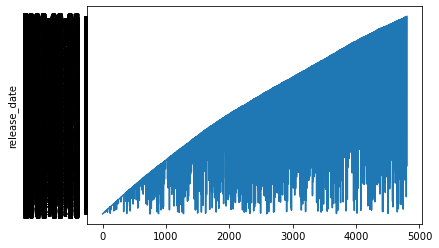

In [13]:

import matplotlib.pyplot as plt
movie['release_date'].fillna( method ='ffill', inplace = True)
plt.plot(movie['release_date'])
plt.ylabel('release_date')
plt.show()

In [ ]:
Không thể kết luận ngày ra mắt bộ phim có ảnh hưởng đến doanh thu hay không